<a href="https://colab.research.google.com/github/sri-singhal/DSA-JAVA-/blob/main/AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries and the required data**

In [ ]:
import pandas as pd
import numpy as np
aqi_list=pd.read_csv("/aqi data.csv")
aqi_list['index'] = aqi_list.index
aqi_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   int64  
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1093 non-null   float64
 9   index   1093 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 85.5 KB


## **Taking A Look At The Dataframe**

In [ ]:
aqi_list=aqi_list.set_index('index')
aqi_list

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
index,,,,,,,,,
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95,0.6,8.7,14.8,169.000000


# **Features Used**
->T - Average Temperature (°C)

->TM - Maximum temperature (°C)

->Tm - Minimum temperature (°C)

->SLP - Atmospheric pressure at sea level (hPa)

->H - Average relative humidity (%)

->VV - Average visibility (Km)

->V - Average wind speed (Km/h)

->VM - Maximum sustained wind speed (Km/h)

# **Categorizing Data On The Basis Of PM 2.5**

In [ ]:
aqi_list['PM 2.5 Category']=pd.cut(aqi_list['PM 2.5'], bins=[0, 30, 60, 90, 120, 250, 1000 ], include_lowest=True, labels=['Good', 'Satisfactory', 'Moderately Polluted','Poor','Very Poor','Severe'])

In [ ]:
aqi_list['PM 2.5 Category']

index
0       Very Poor
1       Very Poor
2       Very Poor
3       Very Poor
4       Very Poor
          ...    
1088       Severe
1089       Severe
1090    Very Poor
1091    Very Poor
1092    Very Poor
Name: PM 2.5 Category, Length: 1093, dtype: category
Categories (6, object): ['Good' < 'Satisfactory' < 'Moderately Polluted' < 'Poor' < 'Very Poor' <
                         'Severe']

In [ ]:
aqi_list.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,PM 2.5 Category
index,,,,,,,,,,
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833,Very Poor
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500,Very Poor
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500,Very Poor
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333,Very Poor
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833,Very Poor


#**Analysing Data With The Help Of Graphs**

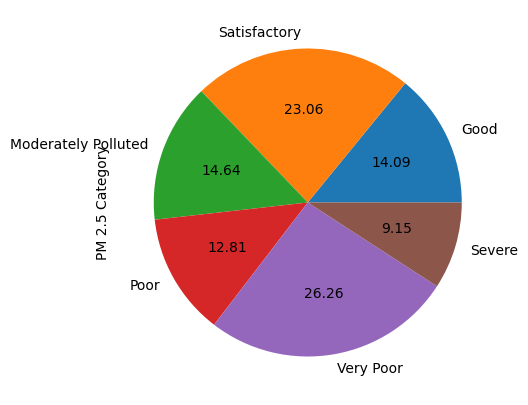

In [ ]:
from matplotlib import pyplot as plt
aqi_list.groupby('PM 2.5 Category')['PM 2.5 Category'].count().plot.pie(autopct='%.2f',figsize=(5,5))

plt.show();

#**Removing Outliers**

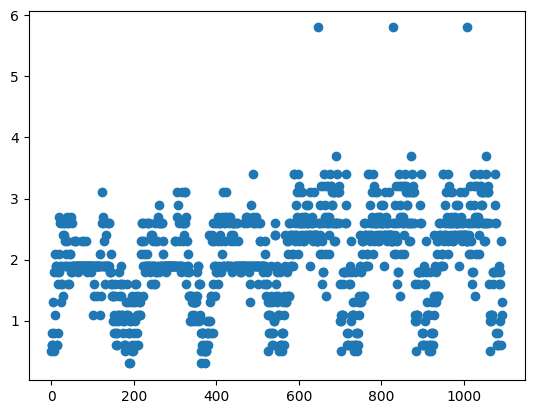

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(0,len(aqi_list)),aqi_list['VV'])
plt.show()

In [ ]:
lwt=aqi_list['V'].mean()-2*aqi_list['V'].std()
upt=aqi_list['V'].mean()+2*aqi_list['V'].std()
df1 = aqi_list[(aqi_list['V'] >= lwt) & (aqi_list['V'] <= upt)]
lwt=df1['VV'].mean()-2*df1['VV'].std()
upt=df1['VV'].mean()+2*df1['VV'].std()
df2 = df1[(df1['VV'] >= lwt) & (df1['VV'] <= upt)]

lwt=df2['VM'].mean()-2*df2['VM'].std()
upt=df2['VM'].mean()+2*df2['VM'].std()
df3 = df2[(df2['VM'] >= lwt) & (df2['VM'] <= upt)]

lwt=df3['SLP'].mean()-2*df3['SLP'].std()
upt=df3['SLP'].mean()+2*df3['SLP'].std()
df4 = df3[(df3['SLP'] >= lwt) & (df3['SLP'] <= upt)]

lwt=df4['H'].mean()-2*df4['H'].std()
upt=df4['H'].mean()+2*df4['H'].std()
aqi_list = df4[(df4['H'] >= lwt) & (df4['H'] <= upt)]

#**Splitting Data Into Trainig And Testing Data**

In [ ]:
X = aqi_list.drop(['PM 2.5','PM 2.5 Category'],axis=1)
Y = aqi_list['PM 2.5']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.5,random_state=2,shuffle=True)

#**Random forest Algorithm**

In [77]:
from sklearn.ensemble import RandomForestRegressor
rmodel = RandomForestRegressor(n_estimators=100,max_depth=9,max_features=3)

rmodel.fit(xtrain.values,ytrain.values)

RandomForestRegressor(max_depth=9, max_features=3)

In [79]:
from sklearn.metrics import r2_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as  np
y_pred=rmodel.predict(xtest.values)

In [81]:
print('accuracy on training data',rmodel.score(xtrain.values,ytrain.values))
print('accuracy on testing data',rmodel.score(xtest.values,ytest.values))
print('overall accuracy',r2_score(ytest,y_pred))

accuracy on training data 0.9562661487830947
accuracy on testing data 0.7578031079148926
overall accuracy 0.7578031079148926


#**Linear Regression**

In [82]:
from sklearn import linear_model
lmodel = linear_model.LinearRegression()

lmodel.fit(xtrain.values,ytrain.values)

LinearRegression()

In [83]:
print(lmodel.score(xtrain.values,ytrain.values))
print(lmodel.score(xtest.values,ytest.values))

0.5695498358622902
0.5121445352115146


In [84]:
y_pred=lmodel.predict(xtest.values)
r2_score(ytest,y_pred)

0.5121445352115146

#**KNN**

In [85]:
from sklearn.neighbors import KNeighborsRegressor
kmodel = KNeighborsRegressor(n_neighbors=20)
kmodel.fit(xtrain.values,ytrain.values)

KNeighborsRegressor(n_neighbors=20)

In [86]:
ytrain_pred = kmodel.predict(xtrain.values)
ytest_pred=kmodel.predict(xtest.values)
print(ytrain.shape)
print(ytrain_pred.shape)

(480,)
(480,)


In [87]:
kmodel.score(xtrain.values,ytrain.values)

0.575981157260601

In [88]:
kmodel.score(xtest.values,ytest.values)

0.49967074050946203

In [89]:
r2_score(ytest.values,ytest_pred)

0.49967074050946203

#**Now Lets Make A Prediction Function**

In [97]:
def predict_aqi(T,TM,Tm,SLP,H,VV,V,VM):

  uv = np.zeros(xtrain.shape[1])
  uv[0] = T
  uv[1] = TM
  uv[2] = Tm
  uv[3] = SLP
  uv[4] = H
  uv[5] = VV
  uv[6] = V
  uv[7] = VM



  return lmodel.predict([uv])

In [98]:
print(predict_aqi(7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4))

[198.74750774]
